In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("regression_dataset.csv")

In [3]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [4]:
df.head(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
5,25,High School,Others,1,Rural,6,Single,Part-time,1,Rent,Townhouse,Female,Car,73406
6,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
7,56,Master's,Education,1,Suburban,34,Married,Part-time,7,Own,Townhouse,Female,Public transit,70066
8,36,Master's,Finance,4,Suburban,45,Married,Full-time,2,Own,Apartment,Female,Public transit,69636
9,40,Bachelor's,Education,4,Urban,21,Married,Full-time,6,Own,Apartment,Female,Biking,5188124


In [5]:
df.tail(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
9990,60,Bachelor's,Education,0,Urban,32,Married,Full-time,6,Rent,Townhouse,Male,Walking,68732
9991,53,Bachelor's,Education,3,Suburban,4,Single,Full-time,1,Own,Apartment,Female,Public transit,66064
9992,65,Master's,Others,1,Urban,28,Married,Self-employed,7,Own,Townhouse,Female,Walking,431034
9993,34,Bachelor's,Technology,4,Urban,16,Married,Part-time,1,Own,Townhouse,Male,Biking,71352
9994,49,High School,Healthcare,3,Rural,44,Married,Part-time,3,Own,Apartment,Male,Biking,95134
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955
9999,37,High School,Healthcare,0,Suburban,48,Married,Part-time,7,Rent,Single-family home,Male,Public transit,1131084


In [6]:
df.shape

(10000, 14)

In [35]:
df["Income"].max()

9992571

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [47]:
df.isna().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [49]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [50]:
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


# Exploratory Data Analysis

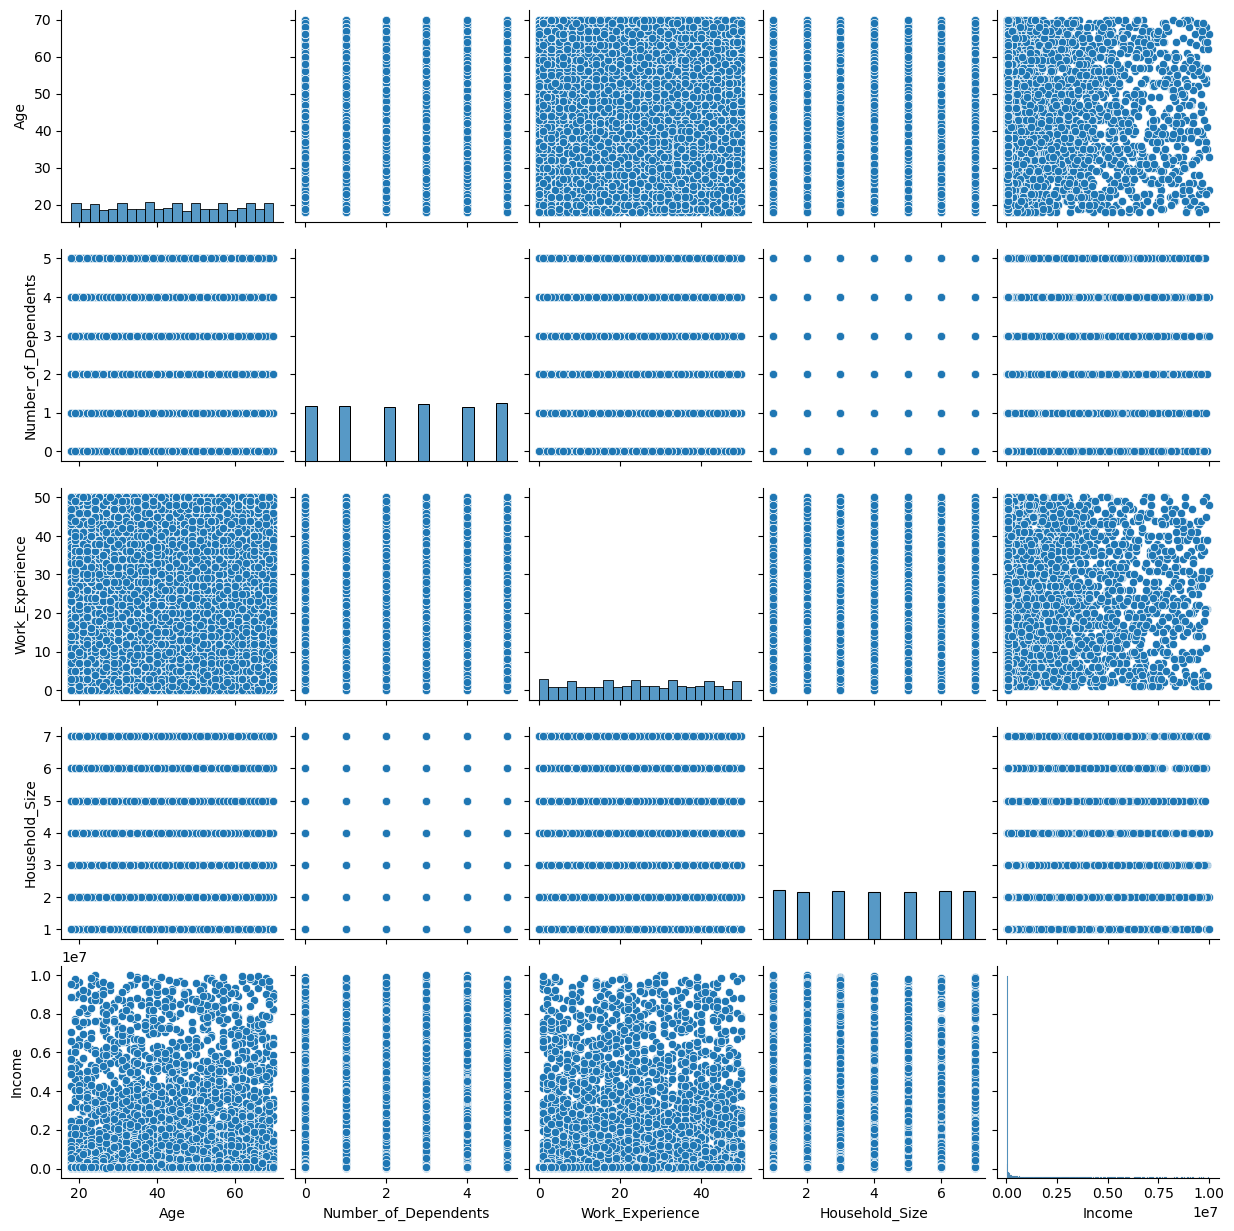

In [52]:
sns.pairplot(data=df)

In [54]:
average_income_Education_lavel = pd.DataFrame(df.groupby('Education_Level')['Income'].mean().reset_index())
average_income_Education_lavel

,Education_Level,Income
0,Bachelor's,812335.910793
1,Doctorate,628710.652695
2,High School,868667.401487
3,Master's,800383.425866


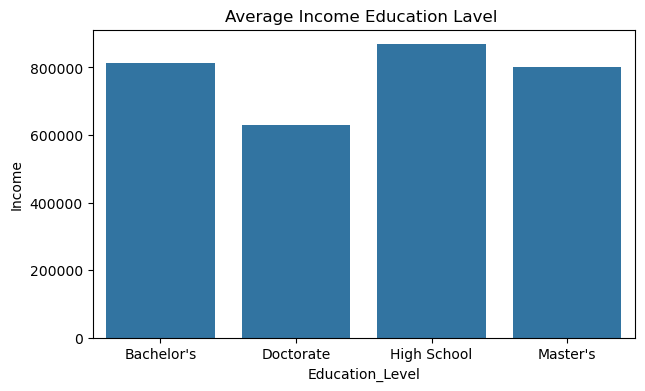

In [57]:
plt.figure(figsize=(7, 4))
sns.barplot(x = 'Education_Level', y = 'Income',data = average_income_Education_lavel )
plt.title("Average Income Education Lavel ")
plt.show()

In [58]:
average_income_Employment_Status = pd.DataFrame(df.groupby('Employment_Status')['Income'].mean().reset_index())
average_income_Employment_Status

,Employment_Status,Income
0,Full-time,780894.959432
1,Part-time,905303.193966
2,Self-employed,772923.665152


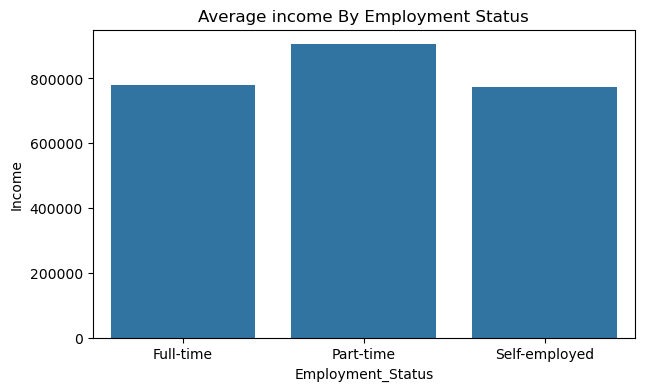

In [59]:
plt.figure(figsize=(7, 4))
sns.barplot(x = 'Employment_Status', y = 'Income',data = average_income_Employment_Status)
plt.title("Average income By Employment Status")
plt.show()

In [60]:
location = pd.DataFrame(df.groupby('Location')['Income'].mean().reset_index())
location

,Location,Income
0,Rural,1.050473e+06
1,Suburban,9.213989e+05
2,Urban,7.542496e+05


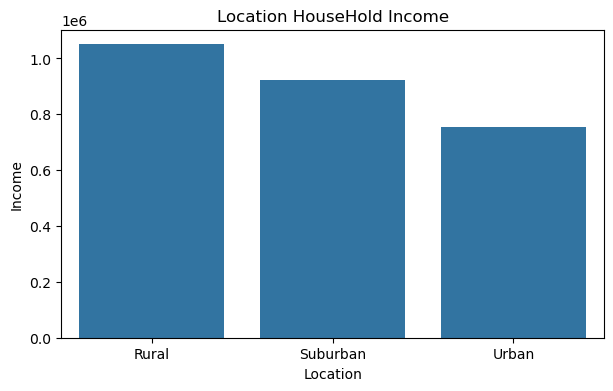

In [61]:
plt.figure(figsize=(7, 4))
sns.barplot(x = 'Location', y = 'Income',data = location)
plt.title("Location HouseHold Income")
plt.show()

In [62]:
average_income_gender = pd.DataFrame(df.groupby('Gender')['Income'].mean().reset_index())
average_income_gender

,Gender,Income
0,Female,820978.331351
1,Male,812896.807535


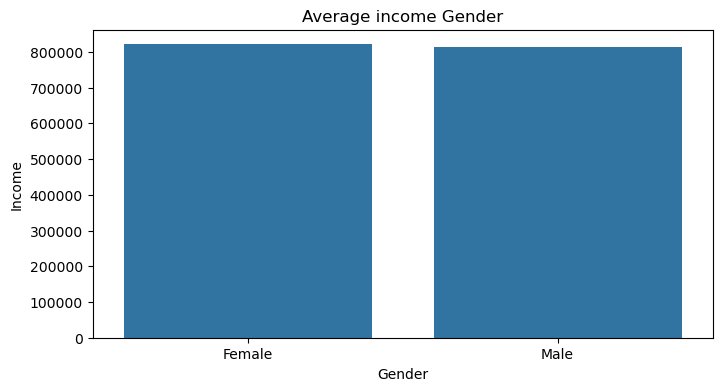

In [63]:
plt.figure(figsize=(8, 4))

sns.barplot(x = 'Gender', y = 'Income',data = average_income_gender)
plt.title("Average income Gender")
plt.show()

In [64]:
average_income_marital_status = pd.DataFrame(df.groupby('Marital_Status')['Income'].mean().reset_index())
average_income_marital_status

,Marital_Status,Income
0,Divorced,780830.581950
1,Married,839259.728193
2,Single,796211.031282


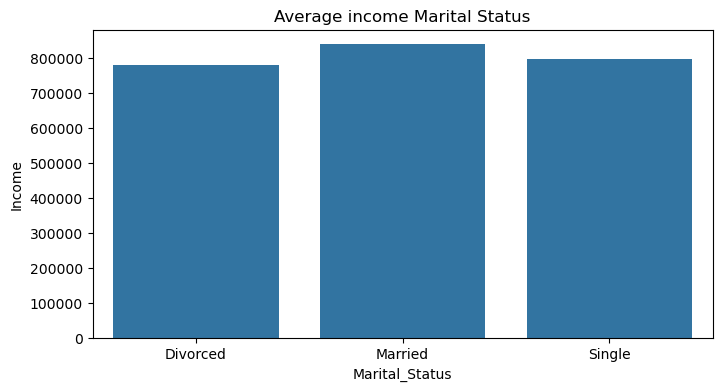

In [65]:
plt.figure(figsize=(8, 4))

sns.barplot(x = 'Marital_Status', y = 'Income',data = average_income_marital_status)
plt.title("Average income Marital Status")
plt.show()

In [66]:
average_income_housing = pd.DataFrame(df.groupby('Type_of_Housing')['Income'].mean().reset_index())
average_income_housing

,Type_of_Housing,Income
0,Apartment,873187.825294
1,Single-family home,793627.046856
2,Townhouse,749279.579733


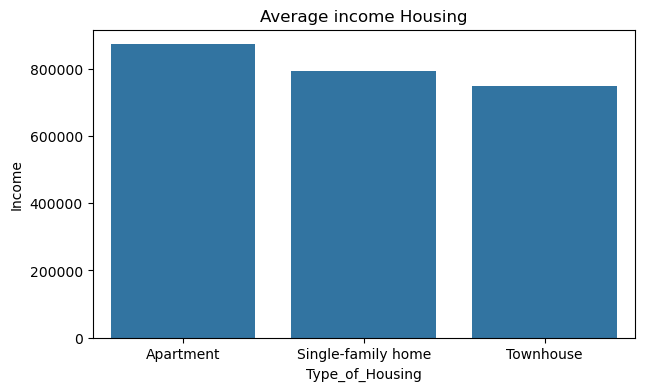

In [67]:
plt.figure(figsize=(7, 4))
sns.barplot(x = 'Type_of_Housing', y = 'Income',data = average_income_housing)
plt.title("Average income Housing")
plt.show()

<Axes: xlabel='Primary_Mode_of_Transportation', ylabel='Count'>

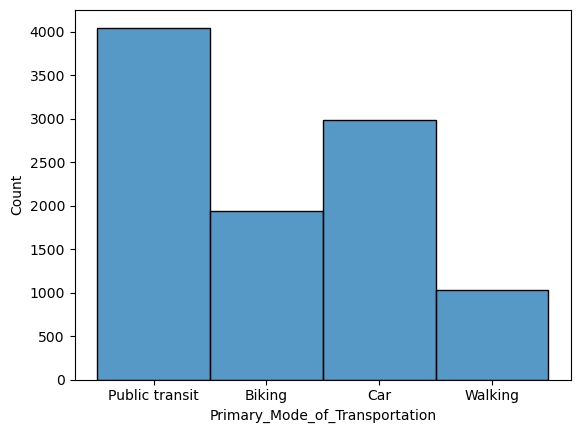

In [68]:
sns.histplot(x="Primary_Mode_of_Transportation",data = df)

# Encoding Categorical Data

In [70]:
df["Education_Level"].unique()
en_data_1 = [["Master's", 'High School', "Bachelor's", 'Doctorate']]
en_data = OrdinalEncoder(categories=en_data_1)
df["Education_Level"] = en_data.fit_transform(df[["Education_Level"]])
df["Education_Level"] = df["Education_Level"].astype("int64")
df["Education_Level"].unique()

array([0, 1, 2, 3], dtype=int64)

In [71]:
df["Occupation"].unique()
en_data_2 = [['Technology', 'Finance', 'Others', 'Education', 'Healthcare']]
en_data = OrdinalEncoder(categories=en_data_2)
df["Occupation"] = en_data.fit_transform(df[["Occupation"]])
df["Occupation"] = df["Occupation"].astype("int64")

In [72]:
df["Occupation"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [73]:
df["Location"].unique()
en_data_3 = [['Urban', 'Rural', 'Suburban']]
en_data = OrdinalEncoder(categories=en_data_3)
df["Location"] = en_data.fit_transform(df[["Location"]])
df["Location"] = df["Location"].astype("int64")

df["Location"].unique()

array([0, 1, 2], dtype=int64)

In [74]:
df["Marital_Status"].unique()
en_data_4 = [['Married', 'Single', 'Divorced']]
en_data = OrdinalEncoder(categories=en_data_4)
df["Marital_Status"] = en_data.fit_transform(df[["Marital_Status"]])
df["Marital_Status"] = df["Marital_Status"].astype("int64")
df["Marital_Status"].unique()

array([0, 1, 2], dtype=int64)

In [75]:
df["Employment_Status"].unique()
en_data_5 = [['Full-time', 'Self-employed', 'Part-time']]
en_data = OrdinalEncoder(categories=en_data_5)
df["Employment_Status"] = en_data.fit_transform(df[["Employment_Status"]])
df["Employment_Status"] = df["Employment_Status"].astype("int64")
df["Employment_Status"].unique()

array([0, 1, 2], dtype=int64)

In [76]:
df["Homeownership_Status"].unique()
en_data_6 = [['Own', 'Rent']]
en_data = OrdinalEncoder(categories=en_data_6)
df["Homeownership_Status"] = en_data.fit_transform(df[["Homeownership_Status"]])
df["Homeownership_Status"] = df["Homeownership_Status"].astype("int64")
df["Homeownership_Status"].unique()

array([0, 1], dtype=int64)

In [77]:
df["Type_of_Housing"].unique()
en_data_7 = [['Apartment', 'Single-family home', 'Townhouse']]
en_data = OrdinalEncoder(categories=en_data_7)
df["Type_of_Housing"] = en_data.fit_transform(df[["Type_of_Housing"]])
df["Type_of_Housing"] = df["Type_of_Housing"].astype("int64")
df["Type_of_Housing"].unique()

array([0, 1, 2], dtype=int64)

In [78]:
df["Gender"].unique()
en_data_8 = [['Male', 'Female']]
en_data = OrdinalEncoder(categories=en_data_8)
df["Gender"] = en_data.fit_transform(df[["Gender"]])
df["Gender"] = df["Gender"].astype("int64")
df["Gender"].unique()

array([0, 1], dtype=int64)

In [79]:
df["Primary_Mode_of_Transportation"].unique()
en_data_9 = [['Public transit', 'Biking', 'Car', 'Walking']]
en_data = OrdinalEncoder(categories=en_data_9)
df["Primary_Mode_of_Transportation"] = en_data.fit_transform(df[["Primary_Mode_of_Transportation"]])
df["Primary_Mode_of_Transportation"] = df["Primary_Mode_of_Transportation"].astype("int64")
df["Primary_Mode_of_Transportation"].unique()

array([0, 1, 2, 3], dtype=int64)

# row number calculated to 70% of rows

In [81]:
raw_train = df.iloc[:7000]
raw_test = df.iloc[7000:].drop(columns='Income')

In [82]:
x = raw_train
y = raw_train['Income']

In [83]:
x

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,0,0,5,0,21,0,0,7,0,0,0,0,72510
1,69,1,1,0,0,4,1,0,7,0,0,0,1,75462
2,46,2,0,1,0,1,1,0,7,0,1,1,2,71748
3,32,1,2,2,0,32,0,0,1,0,0,1,2,74520
4,60,2,1,3,0,15,0,1,4,0,2,0,3,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,70,0,0,0,2,11,0,0,6,1,2,0,0,72364
6996,69,0,4,0,0,29,0,1,2,1,0,0,2,71240
6997,55,1,4,4,0,15,0,2,7,1,1,0,3,73506
6998,40,0,0,4,0,12,0,0,3,0,2,0,0,74224


In [84]:
y

0        72510
1        75462
2        71748
3        74520
4       640210
         ...  
6995     72364
6996     71240
6997     73506
6998     74224
6999     65720
Name: Income, Length: 7000, dtype: int64

# Correlation matrix

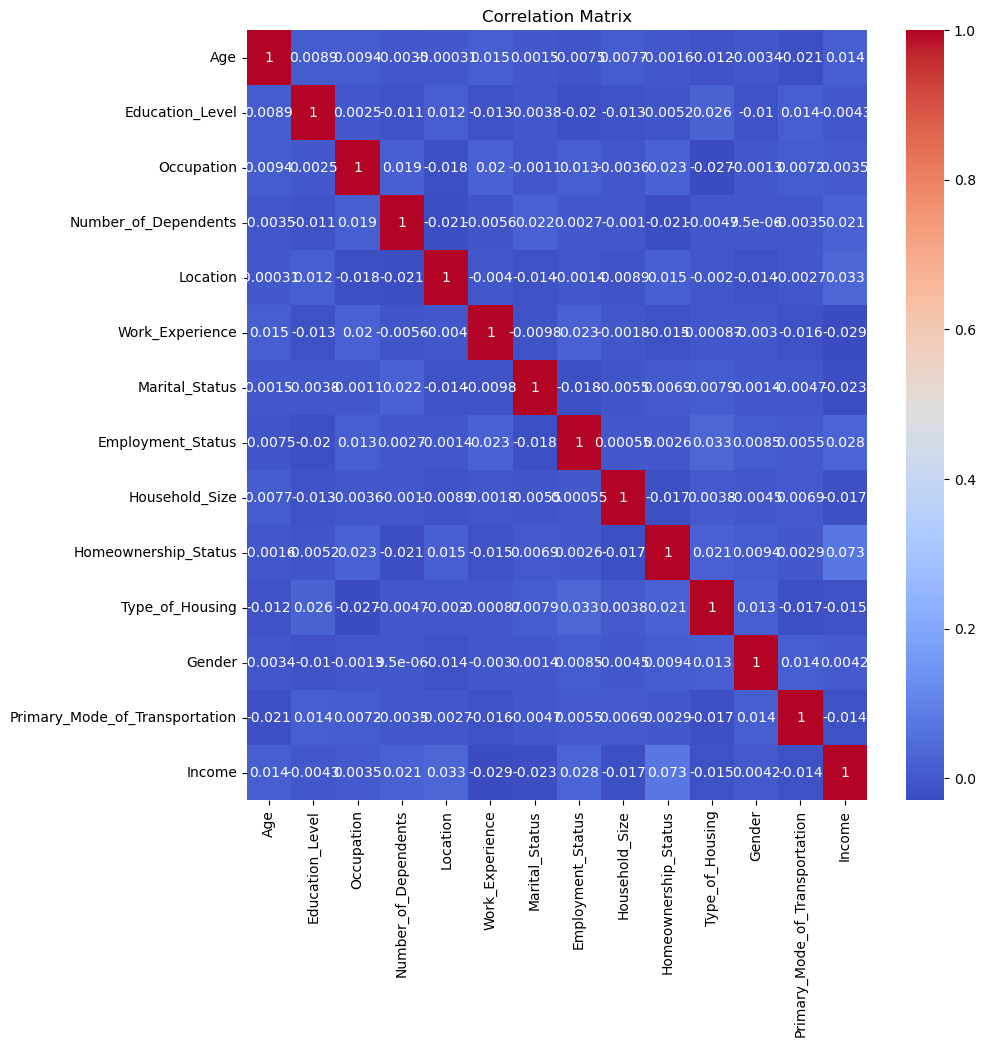

In [86]:
plt.figure(figsize=(10, 10))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [87]:
x.shape

(7000, 14)

In [88]:
y.shape

(7000,)

# Train Test Split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=1)

In [91]:
x_train.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

# Model :- Linear Regression

In [93]:
model1 = LinearRegression() 
model1.fit(x_train, y_train)

LinearRegression()

In [94]:
print("Test accuracy Score :- ",round(model1.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model1.score(x_train,y_train)*100,2),"%")

y_pred1 = model1.predict(x_test)

Test accuracy Score :-  100.0 %
Train accuracy Score :-  100.0 %


In [95]:
mse = mean_squared_error(y_test,y_pred1)
mae = mean_absolute_error(y_test , y_pred1)
rmse = np.sqrt(mse)

print("Mean Square Error :- ",mse)
print("Mean Absolute Error :- ",mae)
print("Root Mean Square Error :- ",rmse)

Mean Square Error :-  5.717910846958644e-19
Mean Absolute Error :-  6.054376301887845e-10
Root Mean Square Error :-  7.561686879895679e-10


# Model :- Decision Tree Regressor

In [97]:
model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [98]:
print("Test accuracy Score :- ",round(model2.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model2.score(x_train,y_train)*100,2),"%")

y_pred2 = model2.predict(x_test)

Test accuracy Score :-  98.96 %
Train accuracy Score :-  98.98 %


In [99]:
mse = mean_squared_error(y_test,y_pred2)
mae = mean_absolute_error(y_test , y_pred2)
rmse = np.sqrt(mse)

print("Mean Square Error :- ",mse)
print("Mean Absolute Error :- ",mae)
print("Root Mean Square Error :- ",rmse)

Mean Square Error :-  30254207423.548683
Mean Absolute Error :-  88404.01776291015
Root Mean Square Error :-  173937.36638097255


In [102]:
n_estimators = [20,30,50,100,200,300,500,700]
max_features = [0.2,0,6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]

In [105]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_samples' : max_samples,
    'max_depth' : max_depth
}

In [118]:
model3 = RandomForestRegressor()
model3.fit(x_train,y_train)

RandomForestRegressor()

In [1246]:
print("Test accuracy Score :- ",round(model3.score(x_test,y_test)*100,2),"%") 
print("Train accuracy Score :- ",round(model3.score(x_train,y_train)*100,2),"%")

y_pred3 = model3.predict(x_test)

Test accuracy Score :-  100.0 %
Train accuracy Score :-  100.0 %


In [1222]:
mse = mean_squared_error(y_test,y_pred3)
mae = mean_absolute_error(y_test , y_pred3)
rmse = np.sqrt(mse)

print("Mean Square Error :- ",mse)
print("Mean Absolute Error :- ",mae)
print("Root Mean Square Error :- ",rmse)

Mean Square Error :-  23956532.157451097
Mean Absolute Error :-  1259.366957142857
Root Mean Square Error :-  4894.54105687664


# Model :-RandomizedSearchCV :- Hyperparameter tuning Random Forest Regressor

In [137]:
grid_s = RandomizedSearchCV(estimator=model3 , param_distributions=param_grid , cv = 5 , verbose=2,n_jobs=-1)

In [139]:
grid_s.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Anish Avasthi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0, 6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 30, 50, 100, 200,
                                                         300, 500, 700]},
                   verbose=2)

In [141]:
grid_s.best_params_

{'n_estimators': 300, 'max_samples': 1.0, 'max_features': 1.0, 'max_depth': 8}

In [143]:
grid_s.best_score_

0.9999915145390327

In [145]:
y_pred4 = grid_s.predict(x_test)

In [147]:
mse = mean_squared_error(y_test,y_pred4)
mae = mean_absolute_error(y_test , y_pred4)
rmse = np.sqrt(mse)

print("Mean Square Error :- ",mse)
print("Mean Absolute Error :- ",mae)
print("Root Mean Square Error :- ",rmse)

Mean Square Error :-  25497113.149000343
Mean Absolute Error :-  2106.1774100872517
Root Mean Square Error :-  5049.466620248157


# Perform the comparative analysis between the models and select the best model. 
## Mention the reason why you are selecting the model.

#### The Random Forest model without hyperparameter tuning has a lower RMSE, indicating better performance.

# Save The Model

In [156]:
import joblib

joblib.dump(model3, r"C:\\Users\\Anish Avasthi\\Desktop\\Sunstone\\random_for_Income.pkl")

['C:\\\\Users\\\\Anish Avasthi\\\\Desktop\\\\Sunstone\\\\random_for_Income.pkl']